In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.shape

(9054, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9054 entries, 0 to 9053
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               9054 non-null   int64  
 1   Glucose                   9054 non-null   int64  
 2   BloodPressure             9054 non-null   int64  
 3   SkinThickness             9054 non-null   int64  
 4   Insulin                   9054 non-null   int64  
 5   BMI                       9054 non-null   float64
 6   DiabetesPedigreeFunction  9054 non-null   float64
 7   Age                       9054 non-null   int64  
 8   Outcome                   9054 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 636.7 KB


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.00000,9054.000000,9054.000000
mean,3.757897,120.838083,69.065827,20.746852,79.661586,32.055335,0.47255,33.159267,0.343274
std,3.333473,32.133105,19.286571,15.970534,112.023935,7.993519,0.32769,11.802062,0.474828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.07800,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.24400,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.000000,0.37600,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.000000,36.600000,0.62700,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.42000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
(data == 0).sum()

Pregnancies                 1354
Glucose                       64
BloodPressure                416
SkinThickness               2618
Insulin                     4354
BMI                          128
DiabetesPedigreeFunction       0
Age                            0
Outcome                     5946
dtype: int64

In [9]:
dataset = data.drop(columns = ["Pregnancies","Age","Outcome"])
dataset

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,138,62,35,0,33.6,0.127
1,84,82,31,125,38.2,0.233
2,145,0,0,0,44.2,0.630
3,135,68,42,250,42.3,0.365
4,139,62,41,480,40.7,0.536
...,...,...,...,...,...,...
9049,101,76,48,180,32.9,0.171
9050,122,70,27,0,36.8,0.340
9051,121,72,23,112,26.2,0.245
9052,126,60,0,0,30.1,0.349


In [10]:
(dataset==0).sum()

Glucose                       64
BloodPressure                416
SkinThickness               2618
Insulin                     4354
BMI                          128
DiabetesPedigreeFunction       0
dtype: int64

In [11]:
for col in dataset.columns:
    mean = dataset[col].mean()
    dataset[col] = dataset[col].replace(0,mean)

In [12]:
(dataset==0).sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
dtype: int64

In [13]:
for col in dataset.columns:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR= Q3 - Q1
    lesser_outlier = Q1 - 1.5*IQR
    greater_outlier = Q3 + 1.5*IQR
    min_value = dataset[col].min()
    max_value = dataset[col].max()
    new_value=[]
    for value in dataset[col]:
        if value < lesser_outlier:
            new_value.append(min_value)
        elif value > greater_outlier:
            new_value.append(max_value)
        else:
            new_value.append(value)
    dataset[col] = new_value

In [14]:
dataset

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,138.0,62.000000,35.000000,79.661586,33.6,0.127
1,84.0,82.000000,31.000000,125.000000,38.2,0.233
2,145.0,69.065827,20.746852,79.661586,44.2,0.630
3,135.0,68.000000,42.000000,846.000000,42.3,0.365
4,139.0,62.000000,41.000000,846.000000,40.7,0.536
...,...,...,...,...,...,...
9049,101.0,76.000000,48.000000,180.000000,32.9,0.171
9050,122.0,70.000000,27.000000,79.661586,36.8,0.340
9051,121.0,72.000000,23.000000,112.000000,26.2,0.245
9052,126.0,60.000000,20.746852,79.661586,30.1,0.349


In [15]:
dataset1 = data[["Pregnancies","Age","Outcome"]]
final_dataset = pd.concat([dataset,dataset1],axis=1)
final_dataset

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age,Outcome
0,138.0,62.000000,35.000000,79.661586,33.6,0.127,2,47,1
1,84.0,82.000000,31.000000,125.000000,38.2,0.233,0,23,0
2,145.0,69.065827,20.746852,79.661586,44.2,0.630,0,31,1
3,135.0,68.000000,42.000000,846.000000,42.3,0.365,0,24,1
4,139.0,62.000000,41.000000,846.000000,40.7,0.536,1,21,0
...,...,...,...,...,...,...,...,...,...
9049,101.0,76.000000,48.000000,180.000000,32.9,0.171,10,63,0
9050,122.0,70.000000,27.000000,79.661586,36.8,0.340,2,27,0
9051,121.0,72.000000,23.000000,112.000000,26.2,0.245,5,30,0
9052,126.0,60.000000,20.746852,79.661586,30.1,0.349,1,47,1


In [16]:
final_dataset.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age,Outcome
count,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000
mean,121.692251,72.363749,27.831374,175.421311,32.798352,0.503962,3.757897,33.159267,0.343274
std,30.472600,12.583838,14.571264,238.340422,8.344355,0.443564,3.333473,11.802062,0.474828
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,0.000000,21.000000,0.000000
25%,99.000000,64.000000,20.746852,79.661586,27.500000,0.244000,1.000000,24.000000,0.000000
50%,117.000000,72.000000,23.000000,79.661586,32.055335,0.376000,3.000000,29.000000,0.000000
75%,140.750000,80.000000,32.000000,129.000000,36.600000,0.627000,6.000000,40.000000,1.000000
max,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,17.000000,81.000000,1.000000


In [17]:
x = final_dataset["Glucose"].value_counts()
x

Glucose
99.0     216
100.0    200
129.0    166
95.0     162
102.0    162
        ... 
186.0     10
62.0      10
44.0      10
191.0     10
177.0     10
Name: count, Length: 136, dtype: int64

In [18]:
total_count=len(final_dataset["Glucose"])

In [19]:
Rel_freq = x/total_count
Rel_freq

Glucose
99.0     0.023857
100.0    0.022090
129.0    0.018334
95.0     0.017893
102.0    0.017893
           ...   
186.0    0.001104
62.0     0.001104
44.0     0.001104
191.0    0.001104
177.0    0.001104
Name: count, Length: 136, dtype: float64

In [20]:
Cumulative_Freq = final_dataset["Glucose"].cumsum()
Cumulative_Freq

0       1.380000e+02
1       2.220000e+02
2       3.670000e+02
3       5.020000e+02
4       6.410000e+02
            ...     
9049    1.101340e+06
9050    1.101462e+06
9051    1.101583e+06
9052    1.101709e+06
9053    1.101802e+06
Name: Glucose, Length: 9054, dtype: float64

In [21]:
def FreqTable(ColumnName, final_dataset):
    FreqTable = pd.DataFrame(columns=["Unique_Values", "Frequency", "Relative_Frequency", "Cummulative_Frequency or cumsum"])
    FreqTable["Unique_Values"] = final_dataset[ColumnName].value_counts().index
    FreqTable["Frequency"] = final_dataset[ColumnName].value_counts().values
    total_count = len(final_dataset[ColumnName])
    FreqTable["Relative_Frequency"] = FreqTable["Frequency"] / total_count
    FreqTable["Cummulative_Frequency or cumsum"] = FreqTable["Relative_Frequency"].cumsum()
    return FreqTable

In [22]:
FreqTable("Glucose",final_dataset)

,Unique_Values,Frequency,Relative_Frequency,Cummulative_Frequency or cumsum
0,99.0,216,0.023857,0.023857
1,100.0,200,0.022090,0.045947
2,129.0,166,0.018334,0.064281
3,95.0,162,0.017893,0.082174
4,102.0,162,0.017893,0.100066
...,...,...,...,...
131,186.0,10,0.001104,0.995582
132,62.0,10,0.001104,0.996687
133,44.0,10,0.001104,0.997791
134,191.0,10,0.001104,0.998896


In [23]:
final_dataset.skew()

Glucose                     0.524991
BloodPressure               0.515637
SkinThickness               3.639329
Insulin                     2.401655
BMI                         2.316847
DiabetesPedigreeFunction    2.878028
Pregnancies                 0.948461
Age                         1.165204
Outcome                     0.660285
dtype: float64

In [24]:
final_dataset.kurtosis()

Glucose                     -0.303883
BloodPressure                2.627131
SkinThickness               17.843309
Insulin                      3.935383
BMI                         11.242956
DiabetesPedigreeFunction     9.653362
Pregnancies                  0.292770
Age                          0.764719
Outcome                     -1.564369
dtype: float64

In [25]:
descriptive = pd.DataFrame(index = ["Mean","Median","Mode","skew","kurtosis","25%","50%","99%","100%"],columns = final_dataset.columns)

In [26]:
for ColumnName in final_dataset.columns:
    descriptive[ColumnName]["Mean"]= final_dataset[ColumnName].mean()
    descriptive[ColumnName]["Median"]= final_dataset[ColumnName].median()
    descriptive[ColumnName]["Mode"]= final_dataset[ColumnName].mode()[0]
    descriptive[ColumnName]["skew"]= final_dataset[ColumnName].skew()
    descriptive[ColumnName]["kurtosis"]= final_dataset[ColumnName].kurtosis()
    descriptive[ColumnName]["25%"]= np.percentile(final_dataset[ColumnName],25)
    descriptive[ColumnName]["50%"]= np.percentile(final_dataset[ColumnName],50)
    descriptive[ColumnName]["99%"]= np.percentile(final_dataset[ColumnName],99)
    descriptive[ColumnName]["100%"]= np.percentile(final_dataset[ColumnName],100)


    



C:\Users\nandh\AppData\Local\Temp\ipykernel_27764\1390815419.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[ColumnName]["Mean"]= final_dataset[ColumnName].mean()
C:\Users\nandh\AppData\Local\Temp\ipykernel_27764\1390815419.p

In [27]:
descriptive

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age,Outcome
Mean,121.692251,72.363749,27.831374,175.421311,32.798352,0.503962,3.757897,33.159267,0.343274
Median,117.0,72.0,23.0,79.661586,32.055335,0.376,3.0,29.0,0.0
Mode,99.0,70.0,20.746852,79.661586,32.0,2.42,1,22,0
skew,0.524991,0.515637,3.639329,2.401655,2.316847,2.878028,0.948461,1.165204,0.660285
kurtosis,-0.303883,2.627131,17.843309,3.935383,11.242956,9.653362,0.29277,0.764719,-1.564369
25%,99.0,64.0,20.746852,79.661586,27.5,0.244,1.0,24.0,0.0
50%,117.0,72.0,23.0,79.661586,32.055335,0.376,3.0,29.0,0.0
99%,195.0,122.0,110.0,846.0,80.6,2.42,13.0,67.0,1.0
100%,199.0,122.0,110.0,846.0,80.6,2.42,17.0,81.0,1.0


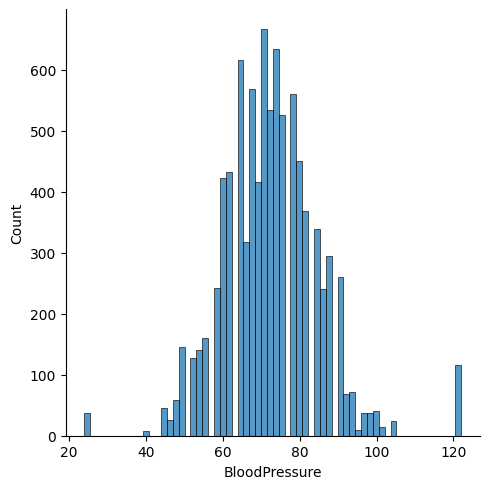

In [28]:
import seaborn as sns
sns.displot(final_dataset["BloodPressure"])

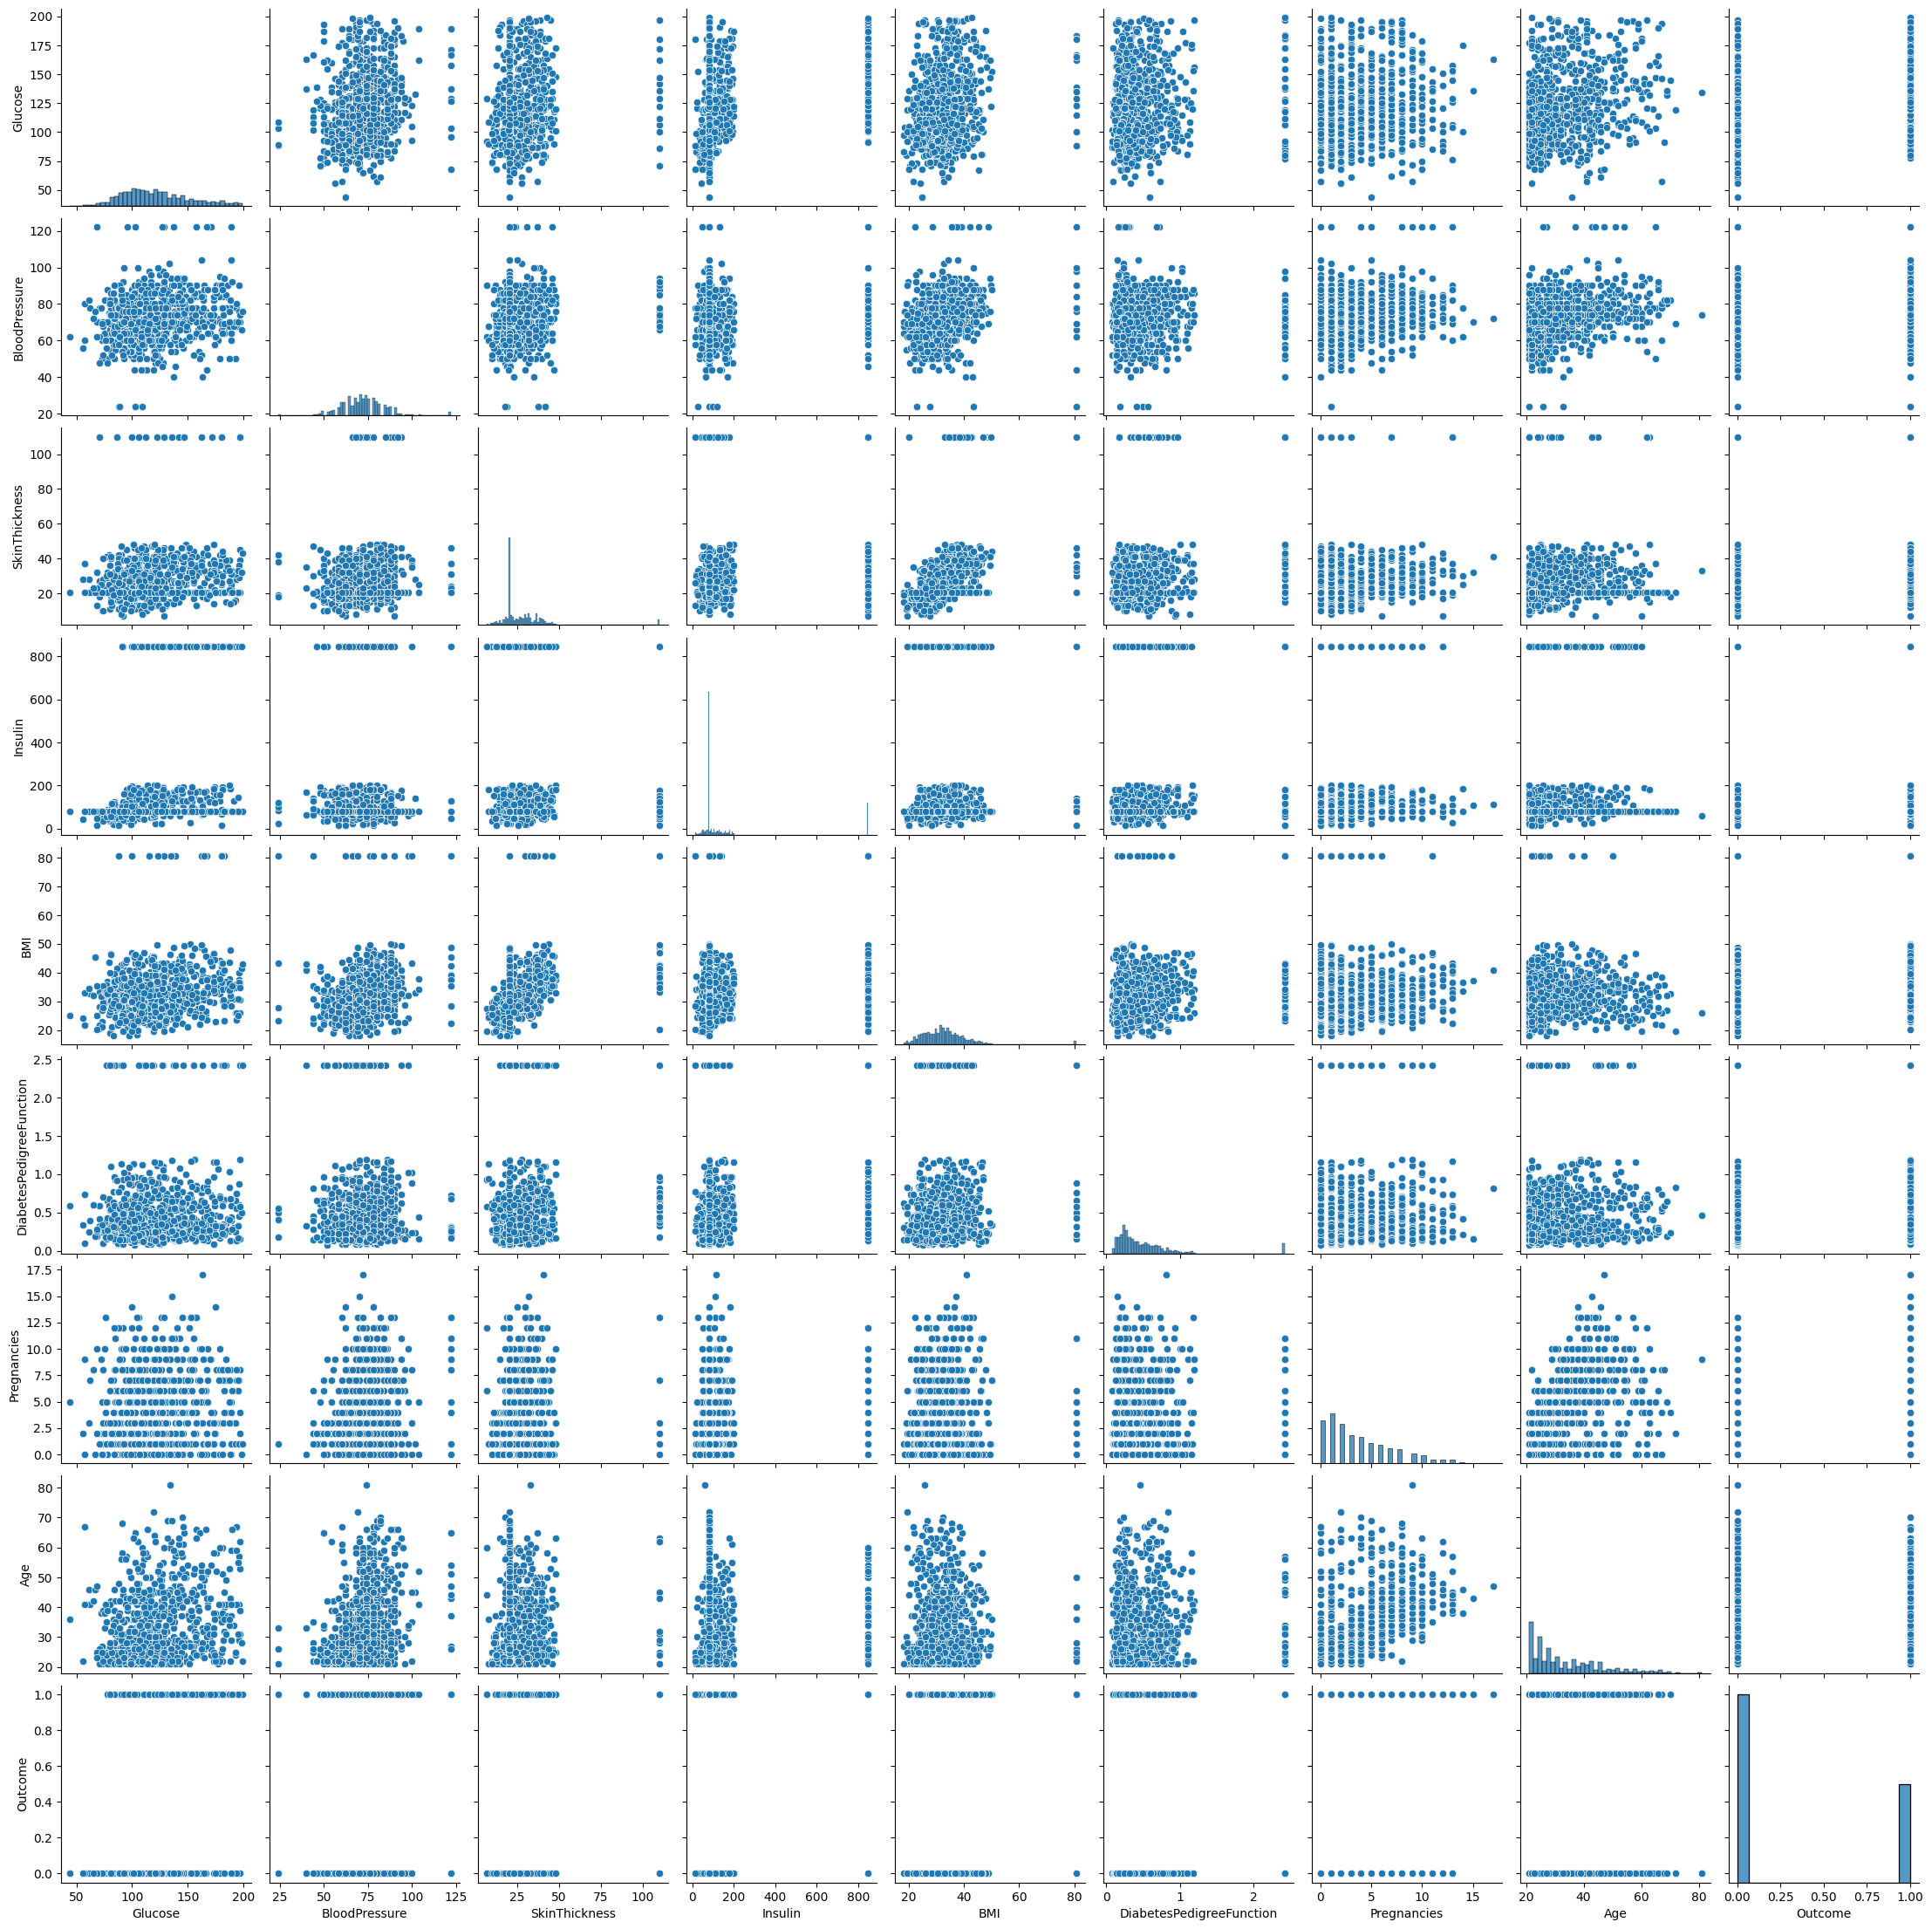

In [29]:
sns.pairplot(final_dataset)

In [30]:
def get_pdf_probability(final_dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(final_dataset,kde=True,kde_kws={'color':'blue'},color='purple')
    pyplot.axvline(startrange,color='red')
    pyplot.axvline(endrange,color='red')
    sample=final_dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print(f'Mean={sample_mean:.3f} StandardDeviation={sample_std:.3f}')
    dist=norm(sample_mean,sample_std)
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area of range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\nandh\AppData\Local\Temp\ipykernel_27764\712363054.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(final_dataset,kde=True,kde_kws={'color':'blue'},color='purple')


Mean=72.364 StandardDeviation=12.584
The area of range(60,80):0.561457284316491


0.561457284316491

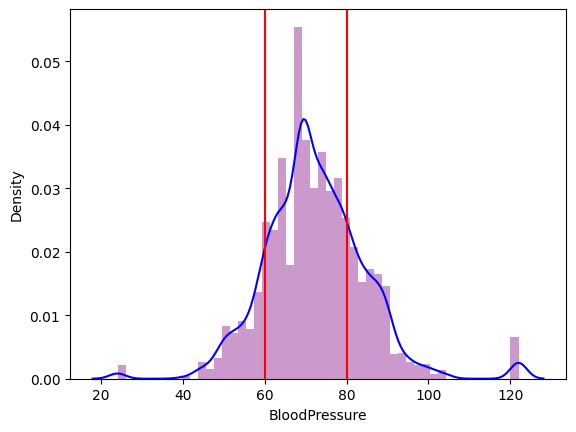

In [31]:
get_pdf_probability(final_dataset["BloodPressure"],60,80)

In [32]:
final_dataset.cov()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age,Outcome
Glucose,928.579355,78.616856,57.319604,2521.094770,53.530153,1.484721,12.272891,92.428163,7.102135
BloodPressure,78.616856,158.352980,23.237645,144.233157,26.151210,0.010398,8.725222,48.045462,0.987707
SkinThickness,57.319604,23.237645,212.321738,700.047203,52.962696,0.723523,-0.885104,0.970480,0.988894
Insulin,2521.094770,144.233157,700.047203,56806.156618,378.913887,12.041767,-10.197967,12.117736,17.499596
BMI,53.530153,26.151210,52.962696,378.913887,69.628264,0.411375,0.066591,-0.118103,1.102950
DiabetesPedigreeFunction,1.484721,0.010398,0.723523,12.041767,0.411375,0.196749,-0.045928,0.118616,0.033228
Pregnancies,12.272891,8.725222,-0.885104,-10.197967,0.066591,-0.045928,11.112041,21.366521,0.351978
Age,92.428163,48.045462,0.970480,12.117736,-0.118103,0.118616,21.366521,139.288671,1.298685
Outcome,7.102135,0.987707,0.988894,17.499596,1.102950,0.033228,0.351978,1.298685,0.225462


In [33]:
final_dataset.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age,Outcome
Glucose,1.000000,0.205018,0.129091,0.347122,0.210521,0.109845,0.120820,0.257002,0.490843
BloodPressure,0.205018,1.000000,0.126731,0.048090,0.249050,0.001863,0.208001,0.323505,0.165302
SkinThickness,0.129091,0.126731,1.000000,0.201573,0.435592,0.111944,-0.018222,0.005643,0.142928
Insulin,0.347122,0.048090,0.201573,1.000000,0.190524,0.113903,-0.012836,0.004308,0.154630
BMI,0.210521,0.249050,0.435592,0.190524,1.000000,0.111145,0.002394,-0.001199,0.278373
DiabetesPedigreeFunction,0.109845,0.001863,0.111944,0.113903,0.111145,1.000000,-0.031062,0.022658,0.157767
Pregnancies,0.120820,0.208001,-0.018222,-0.012836,0.002394,-0.031062,1.000000,0.543099,0.222373
Age,0.257002,0.323505,0.005643,0.004308,-0.001199,0.022658,0.543099,1.000000,0.231745
Outcome,0.490843,0.165302,0.142928,0.154630,0.278373,0.157767,0.222373,0.231745,1.000000


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
def calc_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(X.shape[1])]
    return vif_data

In [36]:
calc_vif(final_dataset[["Glucose","BloodPressure"]])
#vif > 5 correlation is high

,feature,VIF
0,Glucose,14.237689
1,BloodPressure,14.237689


In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Age ~ BMI * Insulin * Glucose * DiabetesPedigreeFunction', data=final_dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p_values = anova_table['PR(>F)']
f_statistics = anova_table['F']
anova_table

,sum_sq,df,F,PR(>F)
BMI,1.962871e+03,1.0,15.766519,7.221492e-05
Insulin,7.172848e+03,1.0,57.615004,3.504089e-14
BMI:Insulin,2.103814e+03,1.0,16.898621,3.977892e-05
Glucose,9.874629e+04,1.0,793.167199,2.390511e-167
BMI:Glucose,9.971059e+03,1.0,80.091285,4.283458e-19
Insulin:Glucose,8.073418e+02,1.0,6.484872,1.089608e-02
BMI:Insulin:Glucose,4.563850e+03,1.0,36.658552,1.463483e-09
DiabetesPedigreeFunction,6.151220e+02,1.0,4.940890,2.625317e-02
BMI:DiabetesPedigreeFunction,5.557241e+01,1.0,0.446378,5.040769e-01
Insulin:DiabetesPedigreeFunction,6.827183e+02,1.0,5.483850,1.921455e-02
